In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('D:\\MOVIESSS\\my\\my\\data science\\02 - train.csv')

In [4]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,3,female,26.000000,0,0,7.9250,S
2,1,1,female,35.000000,1,0,53.1000,S
3,0,3,male,35.000000,0,0,8.0500,S
4,0,1,male,54.000000,0,0,51.8625,S
...,...,...,...,...,...,...,...,...
618,0,2,male,27.000000,0,0,13.0000,S
619,1,1,female,19.000000,0,0,30.0000,S
620,0,3,female,29.699118,1,2,23.4500,S
621,1,1,male,26.000000,0,0,30.0000,C


In [5]:
df.shape

(623, 8)

In [6]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [7]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,3,female,26.000000,0,0,7.9250,S
2,1,1,female,35.000000,1,0,53.1000,S
3,0,3,male,35.000000,0,0,8.0500,S
4,0,1,male,54.000000,0,0,51.8625,S
5,0,3,male,2.000000,3,1,21.0750,S
6,1,3,female,27.000000,0,2,11.1333,S
7,1,2,female,14.000000,1,0,30.0708,C
8,1,3,female,4.000000,1,1,16.7000,S
9,1,1,female,58.000000,0,0,26.5500,S


# EDA

In [8]:
tc = df.corr()

In [9]:
tc

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.342860,-0.074073,-0.036982,0.100075,0.255069
Pclass,-0.342860,1.000000,-0.330976,0.088075,0.001196,-0.543289
Age,-0.074073,-0.330976,1.000000,-0.234223,-0.168488,0.104235
SibSp,-0.036982,0.088075,-0.234223,1.000000,0.420497,0.146080
Parch,0.100075,0.001196,-0.168488,0.420497,1.000000,0.217505
Fare,0.255069,-0.543289,0.104235,0.146080,0.217505,1.000000


In [10]:
import seaborn as sns

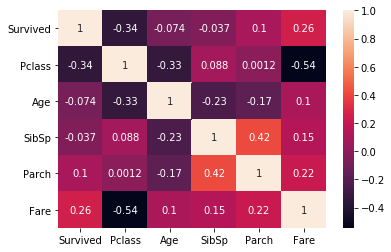

In [11]:
sns.heatmap(tc, annot = True)

# outiers

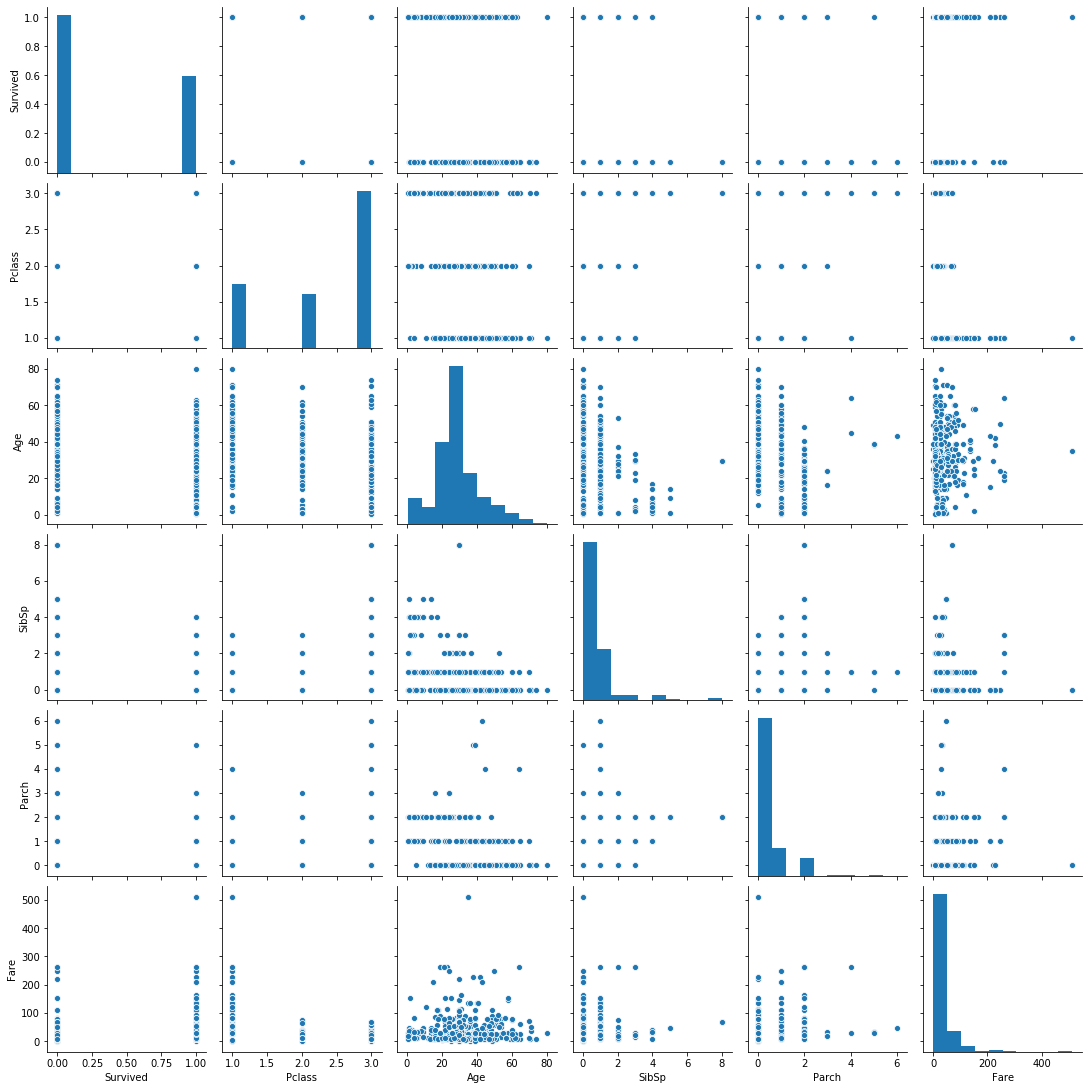

In [12]:
sns.pairplot(df)

In [13]:
Q1_df = df.quantile(0.25)
Q3_df = df.quantile(0.75)
IQR = Q3_df - Q1_df
print(IQR)

Survived     1.0000
Pclass       1.0000
Age         13.0000
SibSp        1.0000
Parch        0.0000
Fare        22.1396
dtype: float64


In [14]:
df_out = df[~((df < (Q1_df - 1.5 * IQR)) |(df > (Q3_df + 1.5 * IQR))).any(axis=1)]
df_out.shape

(411, 8)

# Define x and y

In [15]:
x = df_out[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']]

In [16]:
y = df_out[['Survived']]

# Data Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
x['Sex'] = LabelEncoder().fit_transform(x['Sex'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
x['Embarked'] = LabelEncoder().fit_transform(x['Embarked'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,3,0,26.0,0,0,7.9250,2
2,1,0,35.0,1,0,53.1000,2
3,3,1,35.0,0,0,8.0500,2
4,1,1,54.0,0,0,51.8625,2


# Model Development

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [23]:
x_train.shape

(287, 7)

In [24]:
x_test.shape

(124, 7)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()

In [27]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = model.predict(x_test)

In [29]:
from sklearn import metrics

In [30]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [31]:
cm

array([[78,  4],
       [17, 25]], dtype=int64)

In [32]:
accuracy = metrics.accuracy_score(y_test,y_pred)

In [33]:
accuracy

0.8306451612903226

# Feature Selection ,6 features

In [34]:
from sklearn.feature_selection import RFE

In [35]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [36]:
rfe = RFE(model,6)

In [37]:
fit = rfe.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
fit.ranking_

array([1, 1, 1, 1, 2, 1, 1])

In [39]:
x_new1 = x[['Pclass', 'Sex', 'Age', 'SibSp','Fare', 'Embarked']]

In [40]:
x_new1_train, x_new1_test, y_train, y_test = train_test_split(x_new1,y,test_size = 0.3)

In [41]:
x_new1.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked'], dtype='object')

In [42]:
model1 = LogisticRegression()

In [43]:
model1.fit(x_new1_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred1= model1.predict(x_new1_test)

In [45]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [46]:
cm

array([[66, 22],
       [29,  7]], dtype=int64)

In [47]:
accuracy = metrics.accuracy_score(y_test,y_pred1)

In [48]:
accuracy

0.8064516129032258

In [49]:
#By using the x_new1 The accuracy increases.

In [50]:
#test the data by using test csv

In [51]:
df_test=pd.read_csv('D:\\MOVIESSS\\my\\my\\data science\\03 - test.csv')

In [52]:
df_test.shape

(266, 8)

In [53]:
x_result_test = df_test[['Pclass','Sex', 'Age', 'SibSp','Fare', 'Embarked']]

In [54]:
x_result_test['Sex'] = LabelEncoder().fit_transform(x_result_test['Sex'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
x_result_test['Embarked'] = LabelEncoder().fit_transform(x_result_test['Embarked'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
y_result_test = df_test[['Survived']]

In [57]:
y_result_pred = model1.predict(x_result_test)

In [58]:
y_result_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0], dtype=int64)

In [59]:
cm = metrics.confusion_matrix(y_result_test,y_result_pred)

In [60]:
cm

array([[121,  41],
       [ 18,  86]], dtype=int64)

In [61]:
accuracy = metrics.accuracy_score(y_result_test,y_result_pred)

In [62]:
accuracy

0.7781954887218046